<a href="https://colab.research.google.com/github/chan-kh/Music-Sentiment-Analysis/blob/main/LSTM_2outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import os
import datetime
from google.colab import drive

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import MinMaxScaler

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Bidirectional

from math import sqrt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [163]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/features_60frames_allsongs.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,song_id,frame_num,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,valence,arousal
0,2,0,0.157715,0.000011,5604.262879,3246.069688,9549.975586,18.349374,0.283305,0.000000,-636.134705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654255,0.699066,0.261531,0.874848,1.000000,0.333313,0.812421,0.488101,0.413135,0.640419,0.671442,0.490904,0.725918,0.250459,0.284098,0.647150,0.349017,0.147453,0.501239,0.074669,0.070883,0.633342,0.184297,0.136420,0.700169,0.030602,0.209675,0.828279,0.124886,0.257948,1.000000,0.071105,0.309559,0.798000,0.076693,0.276441,-0.134078,0.072852,-0.134683,0.086125,0.060471,0.042898,-0.073341,-0.109386
1,2,1,0.051758,0.096817,1443.667160,2057.611806,3036.181641,27.017306,0.003931,1.576688,-120.319748,129.464996,-4.253306,22.214062,8.163963,16.415987,15.152133,7.878392,-6.823561,-0.831550,-7.218902,-4.558928,-1.807601,12.948887,-9.162554,-3.758020,-5.506585,-1.227700,-4.439484,1.684063,0.528904,0.624552,0.263783,0.891966,0.850903,0.331133,1.000000,1.000000,0.408033,0.713866,0.681263,0.480444,0.245905,0.378263,0.278916,0.160639,0.397115,0.147040,0.285743,0.536704,0.072041,0.314144,0.652729,0.144099,0.269362,0.637670,0.218737,0.382769,0.677961,0.263132,0.424450,0.649488,0.317883,0.517798,0.579528,0.282752,-0.088692,0.052331,-0.112961,0.075804,0.041915,0.033029,-0.074661,-0.114942
2,2,2,0.101562,0.096426,2348.097128,2387.006355,4941.870117,22.434103,0.013857,0.152583,-107.915352,76.319107,-14.175928,45.124214,1.209538,7.516734,-5.023264,6.480774,-0.513962,8.108901,-0.198636,-3.022716,2.078595,4.819644,-16.200150,-3.348299,-5.746615,-9.680576,-17.688511,-5.846364,0.190785,0.290683,0.265836,0.206553,0.217986,0.329024,0.491271,0.576434,0.402986,1.000000,0.924618,0.469653,0.706139,0.605435,0.273279,0.307669,0.224213,0.146400,0.107266,0.206321,0.073380,0.222554,0.297425,0.151825,0.408395,0.409732,0.227828,0.563377,0.734764,0.268284,0.755202,1.000000,0.326054,0.528056,0.687259,0.288720,-0.034494,0.031843,-0.070020,0.068549,0.021691,0.023202,-0.074077,-0.116413
3,2,3,0.062500,0.086847,1692.187106,1872.280637,3219.213867,21.295763,0.004178,0.224268,-148.255432,121.565720,-36.703545,33.151939,4.518500,5.197342,-8.610166,4.267920,8.706326,-17.273952,-11.429454,4.515498,-7.324573,4.467141,-13.720921,-3.195490,-3.931114,-7.317858,-15.654930,-15.824336,0.245845,0.300974,0.267710,0.523842,0.578168,0.326966,1.000000,0.842026,0.397746,0.846539,1.000000,0.458391,0.477668,0.673670,0.267148,0.095004,0.189054,0.145584,0.031817,0.101448,0.075003,0.024125,0.114284,0.159790,0.044276,0.137589,0.237066,0.215029,0.300263,0.273559,0.177739,0.341496,0.334054,0.110806,0.207098,0.294537,-0.013095,0.020309,-0.055259,0.034349,0.011610,0.012032,-0.078154,-0.118613
4,2,4,0.120605,0.113167,2632.895857,2453.043616,5329.467773,18.914987,0.025196,1.035493,-71.919838,76.267471,-28.003765,15.988888,4.667567,35.548042,-6.664427,-5.128408,9.827440,-1.635414,-5.240368,-1.569069,-1.458279,7.581460,-16.175152,-6.295955,-9.435411,-3.781498,-8.782184,-7.635081,0.223808,0.355715,0.269517,0.202841,0.376315,0.324933,0.624933,0.684395,0.392219,1.000000,1.000000,0.446547,0.319092,0.

In [164]:
df.shape

(104640, 74)

In [165]:
df =df.iloc[np.random.permutation(np.arange(104640).reshape(-1,60)).ravel()]

In [166]:
# df.to_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/shuffled_data.csv',index=False)

In [167]:
df.shape

(104640, 74)

In [168]:
df.pop('song_id')
df.pop('frame_num')

67500      0
67501      1
67502      2
67503      3
67504      4
          ..
104035    55
104036    56
104037    57
104038    58
104039    59
Name: frame_num, Length: 104640, dtype: int64

In [169]:
y = df.loc[:,'valence':'arousal']
print(y.shape)
y.head()

(104640, 2)


,valence,arousal
67500,0.232,0.233
67501,0.230,0.236
67502,0.231,0.243
67503,0.229,0.249
67504,0.221,0.261


In [170]:
df.pop('valence')
df.pop('arousal')

67500     0.233
67501     0.236
67502     0.243
67503     0.249
67504     0.261
          ...  
104035   -0.025
104036   -0.029
104037   -0.033
104038   -0.029
104039   -0.016
Name: arousal, Length: 104640, dtype: float64

In [171]:
df.head()


,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5
67500,0.114258,0.055432,1827.251352,2247.662126,3832.910156,18.920545,0.008750,0.006562,-396.142639,120.910706,0.573588,0.693856,-21.688549,-10.846865,10.666288,2.888609,6.945567,1.628537,7.508766,-2.241290,-6.218233,-4.262554,-6.379598,1.999012,-2.788420,-1.861445,3.488858,4.707385,0.355172,0.448455,0.307056,0.363345,0.553089,0.350189,0.423829,0.603772,0.235921,0.579991,1.000000,0.224437,0.673790,0.550733,0.281469,1.000000,0.946564,0.327507,0.974398,0.306073,0.253240,0.576282,0.520167,0.337022,0.526472,0.511172,0.306016,0.803759,0.367364,0.306245,0.481729,0.180817,0.253951,0.329179,0.368589,0.246843,-0.084561,0.074842,0.003420,0.066023,-0.042594,0.000349
67501,0.038086,0.121555,872.306734,1213.874654,1528.857422,17.163761,0.000163,5.130683,-218.266449,199.997375,-18.331976,55.968880,-18.832420,-12.078157,31.799479,-0.541484,7.030054,4.444386,-0.152206,3.249923,-3.716457,-2.173933,-0.012266,7.452060,0.031279,6.996912,-4.375631,5.651297,0.396115,0.638878,0.307939,0.102109,0.587333,0.352294,0.061243,0.369334,0.236114,0.104916,0.348683,0.222025,0.740401,0.781796,0.275628,1.000000,1.000000,0.322140,0.155009,0.737529,0.254526,0.092174,0.665069,0.338442,0.147084,0.527076,0.304248,0.157279,0.433254,0.308344,0.049166,0.439118,0.259055,0.216197,0.485545,0.249386,-0.010653,0.019894,0.006246,0.051320,-0.008742,0.003695
67502,0.034180,0.190434,886.081060,1628.699414,1550.390625,19.650156,0.000384,19.895828,-189.324387,152.216614,12.739872,32.042313,6.351142,14.010340,31.374111,14.496212,14.495318,33.242401,0.192300,-7.003197,-13.620443,15.237366,1.840440,9.443641,-5.615952,-5.513485,-2.671668,-0.074013,0.195053,0.833508,0.309163,0.355931,0.865596,0.354393,0.414506,0.727291,0.236648,0.358473,0.766514,0.219928,0.208056,0.495121,0.269585,0.238240,0.590788,0.316748,0.156163,0.701209,0.255413,0.230935,1.000000,0.339542,0.469728,0.960405,0.302263,1.000000,0.777138,0.310031,0.208241,0.579283,0.264016,0.142150,0.721515,0.252461,0.022081,-0.005234,-0.063753,0.153990,-0.012902,0.002497
67503,0.025391,0.136881,765.268303,1356.848612,1281.225586,18.138461,0.000233,18.890882,-219.603775,168.773041,10.657866,56.606407,-16.183134,-3.427108,18.240604,20.259289,14.099522,40.262833,8.946842,7.046292,-10.629255,-16.880310,13.597317,19.355431,8.487907,-13.969538,-12.281852,9.959250,0.310057,0.902937,0.310791,0.450064,0.826279,0.356568,0.549170,0.605043,0.237447,0.628966,0.802778,0.218127,0.820712,0.880284,0.263334,0.723695,0.840420,0.311237,0.482207,0.783848,0.255848,0.672191,1.000000,0.340283,1.000000,0.839311,0.300077,0.607047,0.566211,0.311301,0.398904,0.605661,0.268875,0.346424,0.785540,0.256116,0.017431,-0.018258,0.015476,0.146241,0.006329,-0.012515
67504,0.070801,0.088296,1150.692973,1636.890706,1873.388672,20.643082,0.001057,2.652045,-180.000916,149.182648,-6.739173,10.275494,-14.146664,20.667248,24.636745,27.563103,0.521625,-0.356735,-24.792046,-5.426181,-0.226641,25.907578,15.964226,20.986324,10.921309,-12.361422,-27.177286,0.723817,0.972975,1.000000,0.312791,0.448301,0.981557,0.358905,0.243138,0.665727,0.238471,0.113222,0.372163,0.216625,0.189379,0.569159,0.256895,0.293246,0.869559,0.305565,0.233580,0.771546,0.255818,0.119919,0.700346,0.34056

In [172]:
# df_mean = df.mean()
# df_std = df.std()

# df = (df - df_mean) / df_std


In [173]:
# print(type(df))

In [174]:
features = df.to_numpy()
y = y.to_numpy()

In [175]:
print(features.shape)
print(y.shape)

(104640, 70)
(104640, 2)


In [176]:
features = features.reshape(1744,60,70)
y = y.reshape(1744,60,2)

In [177]:
train_X , train_y = features[0:1220] , y[0:1220]
test_X , test_y = features[1220:1744] , y[1220:1744]
# val_X , val_y = features [1569:1744] , valence[0:1220]

In [178]:
print("train_X :" , train_X.shape , "train_y shape:" , train_y.shape)
print("test_X :" , test_X.shape , "test_y shape:" , test_y.shape)
# print("val_X :" , val_X.shape , "val_y shape:" , val_y.shape)


train_X : (1220, 60, 70) train_y shape: (1220, 60, 2)
test_X : (524, 60, 70) test_y shape: (524, 60, 2)


In [179]:
# print(features.shape)
# for i in range(1):
#   print(features)

In [180]:
# print(valence.shape)
# print(valence)

In [181]:
# print(type(features))
# print(features.shape)

In [182]:
model = Sequential()

# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))

# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(32,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(16,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(8,return_sequences=True, input_shape=(60,70))))




model.add(Dense(2))
model.compile(loss='mse', optimizer='adam')

In [183]:
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/50
39/39 - 2s - loss: 0.1137 - val_loss: 0.0461
Epoch 2/50
39/39 - 1s - loss: 0.0595 - val_loss: 0.0431
Epoch 3/50
39/39 - 1s - loss: 0.0516 - val_loss: 0.0425
Epoch 4/50
39/39 - 1s - loss: 0.0488 - val_loss: 0.0418
Epoch 5/50
39/39 - 1s - loss: 0.0472 - val_loss: 0.0425
Epoch 6/50
39/39 - 1s - loss: 0.0452 - val_loss: 0.0412
Epoch 7/50
39/39 - 1s - loss: 0.0443 - val_loss: 0.0412
Epoch 8/50
39/39 - 1s - loss: 0.0446 - val_loss: 0.0424
Epoch 9/50
39/39 - 1s - loss: 0.0450 - val_loss: 0.0437
Epoch 10/50
39/39 - 1s - loss: 0.0447 - val_loss: 0.0444
Epoch 11/50
39/39 - 1s - loss: 0.0437 - val_loss: 0.0428
Epoch 12/50
39/39 - 1s - loss: 0.0424 - val_loss: 0.0422
Epoch 13/50
39/39 - 1s - loss: 0.0419 - val_loss: 0.0394
Epoch 14/50
39/39 - 1s - loss: 0.0405 - val_loss: 0.0390
Epoch 15/50
39/39 - 1s - loss: 0.0399 - val_loss: 0.0405
Epoch 16/50
39/39 - 1s - loss: 0.0416 - val_loss: 0.0410
Epoch 17/50
39/39 - 1s - loss: 0.0426 - val_loss: 0.0413
Epoch 18/50
39/39 - 1s - loss: 0.0423 - 

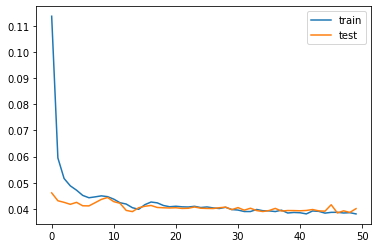

<Figure size 432x288 with 0 Axes>

In [184]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.savefig("training loss 350epochs_5layers")

In [185]:
history.history
print('overall loss' , np.mean(history.history['loss']))
print('overall val_loss' , np.mean(history.history['val_loss']))

overall loss 0.04290119633078575
overall val_loss 0.0406180027872324


In [186]:
predicted_y = model.predict(test_X)


In [187]:
print(predicted_y.shape)
print(test_y.shape)

(524, 60, 2)
(524, 60, 2)


In [188]:
predicted_valence = predicted_y[:,:,0]
predicted_arousal = predicted_y[:,:,1]
test_valence = test_y[:,:,0]
test_arousal = test_y[:,:,1]

In [189]:
# for i in range(1):
  # print(predicted_valence[i])
  # print(predicted_arousal[i])
  # print(test_valence[i])
  # print(test_arousal[i])

In [190]:
predicted_valence = predicted_valence.reshape(31440,)
test_valence = test_valence.reshape(31440,)
predicted_arousal = predicted_arousal.reshape(31440,)
test_arousal = test_arousal.reshape(31440,)

In [191]:
def metrics(y_true,y_pred,name):
  print(name,"")
  mae = mean_absolute_error(y_true,y_pred)
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  pearson_corr = pearsonr(y_true,y_pred)
  spearman_corr = spearmanr(y_true,y_pred)
  
  print('RMSE : ',rmse)
  print('Pearson : ',pearson_corr)
  print('MAE : ',mae)
  print('R2 : ',r2)
  print('Spearman : ',spearman_corr,'\n')


In [192]:
def graph_results(x,y,title, xlim=-1, ylim=-1):
  #x and y are variables ( y_pred vs y_true )
  #Important
  plt.scatter(x,y,s=15)

  # if xlim != -1: plt.xlim([0, xlim])
  # if ylim != -1: plt.ylim([0, ylim])
  # plt.gca().set_ylim([1.5,7.5])
  # plt.gca().set_xlim([1.5,9])
  #Fix 
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title((title))
  # m, b = np.polyfit(x, y, 1)
  # plt.plot(x, m*x + b, color='red')  
  plt.savefig(title)

  plt.show()

valence 
RMSE :  0.20729071725349632
Pearson :  (0.5136570779322871, 0.0)
MAE :  0.16399024701557707
R2 :  0.2242532946646002
Spearman :  SpearmanrResult(correlation=0.5107787887304526, pvalue=0.0) 



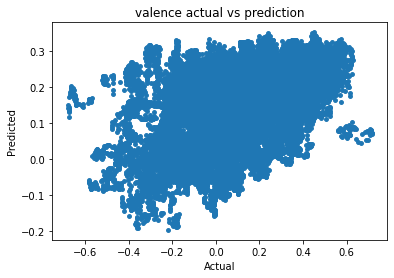

In [193]:
metrics(test_valence,predicted_valence,'valence')
graph_results(test_valence,predicted_valence,'valence actual vs prediction')


arousal 
RMSE :  0.19301154302922913
Pearson :  (0.7463894095188601, 0.0)
MAE :  0.15438932982278253
R2 :  0.5501505454160265
Spearman :  SpearmanrResult(correlation=0.749003043480939, pvalue=0.0) 



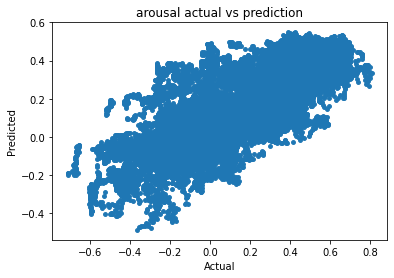

In [194]:
metrics(test_arousal,predicted_arousal,'arousal')
graph_results(test_arousal,predicted_arousal,'arousal actual vs prediction')